Part 1 a and b 8 images and thiers 16 cross sections

Screen resolution: 1496 x 967 pixels
Image dimensions: 1496 x 967 pixels


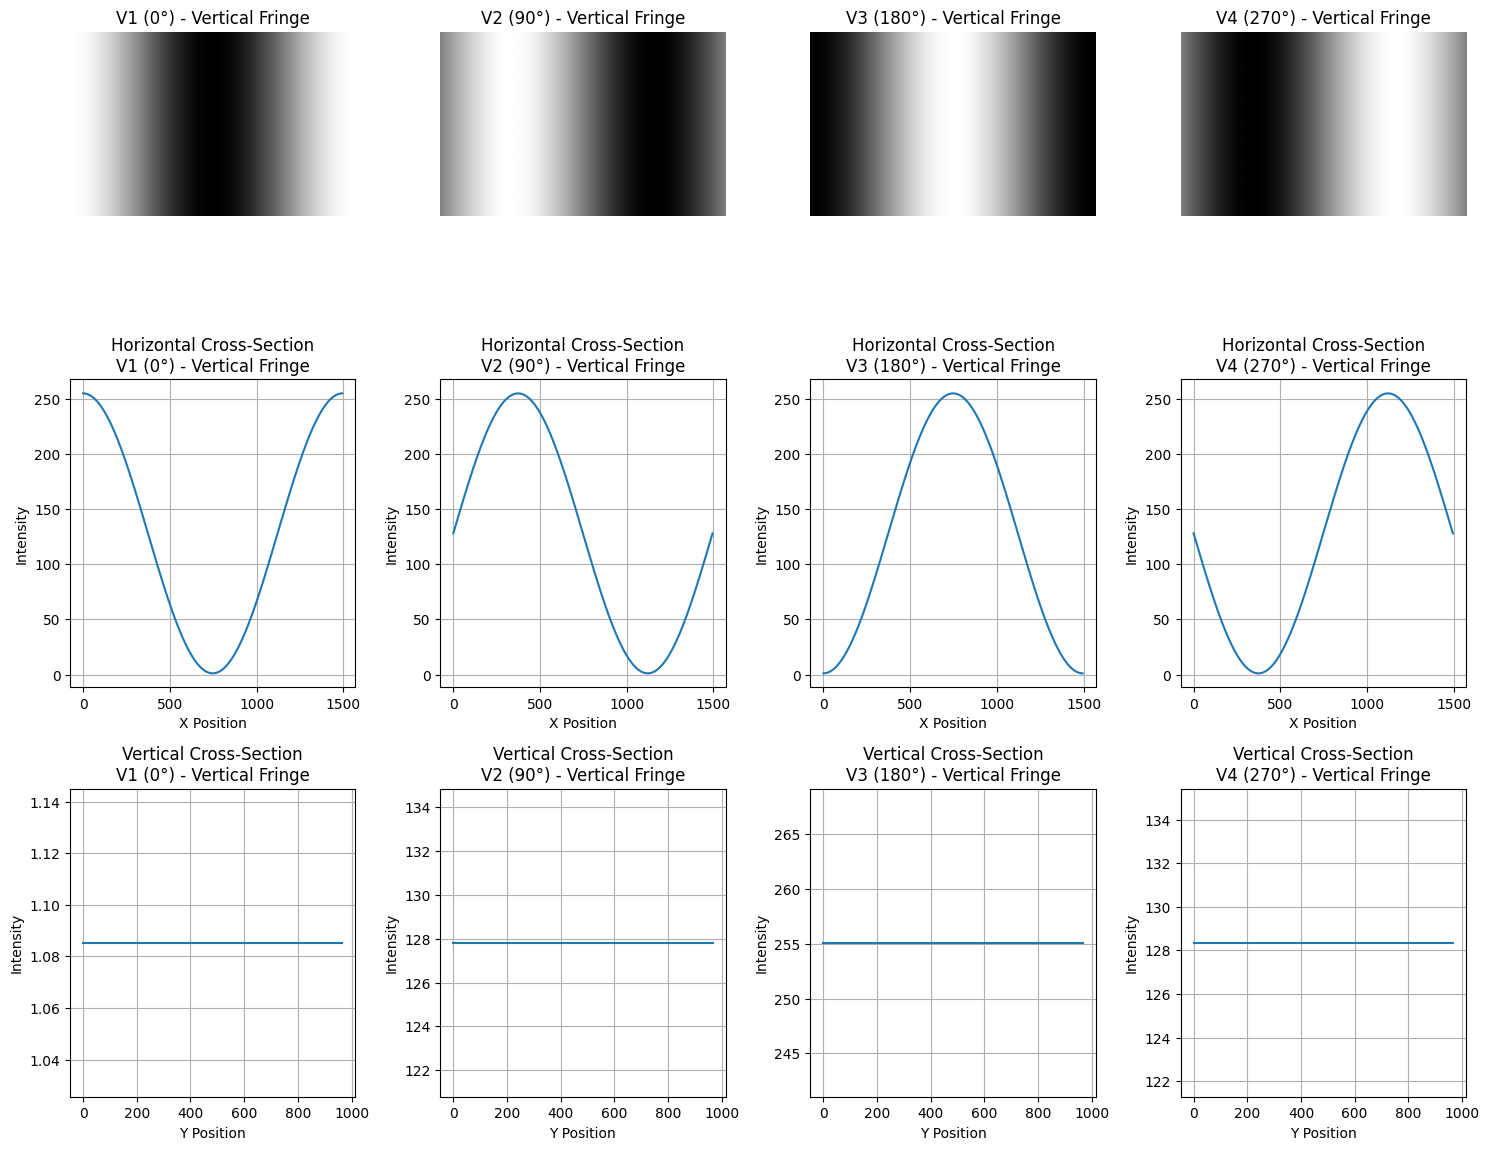

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import unwrap_phase

def generate_sinusoidal_fringe_pattern(shape, amplitude=1.0, background=1.0, orientation='vertical'):
    """
    Generate an initial image with a sinusoidal fringe pattern of one period.
    
    Parameters:
    - shape: Tuple (height, width) of the image.
    - amplitude: Amplitude of the sinusoidal pattern.
    - background: Background intensity (DC component).
    - orientation: 'vertical' for vertical fringes, 'horizontal' for horizontal fringes.
    
    Returns:
    - initial_image: Initial image with sinusoidal fringe pattern.
    - true_phase: True phase map of the fringe pattern.
    """
    height, width = shape
    if orientation == 'vertical':
        x = np.linspace(0, 2 * np.pi, width)  # One period across the width
        X = np.tile(x, (height, 1))  # Repeat the pattern vertically
        true_phase = X  # Phase varies from 0 to 2pi across the width
    elif orientation == 'horizontal':
        phase_shift = np.pi/2
        scaled_height = height/width * 2 * np.pi
        initial_y_offset = (2 * np.pi - scaled_height)/2
        y = np.linspace(initial_y_offset - phase_shift, (scaled_height + initial_y_offset - phase_shift), height)
        Y = np.tile(y, (width, 1)).T  # Repeat the pattern horizontally
        true_phase = Y  # Phase varies from 0 to 2pi across the height
    else:
        raise ValueError("Orientation must be 'vertical' or 'horizontal'")
    
    initial_image = background + amplitude * np.cos(true_phase)
    return initial_image, true_phase

def generate_phase_shifted_images(initial_image, true_phase):
    """
    Generate four phase-shifted images from the initial image.
    
    Parameters:
    - initial_image: Initial image with sinusoidal fringe pattern.
    - true_phase: True phase map of the initial image.
    
    Returns:
    - I1, I2, I3, I4: Four phase-shifted images (0, pi/2, pi, 3pi/2).
    """
    background = np.mean(initial_image)  # Estimate background intensity
    amplitude = (np.max(initial_image) - np.min(initial_image)) / 2  # Estimate amplitude
    
    I1 = background + amplitude * np.cos(true_phase)  # 0 phase shift
    I2 = background + amplitude * np.cos(true_phase - np.pi/2)  # pi/2 phase shift
    I3 = background + amplitude * np.cos(true_phase - np.pi)  # pi phase shift
    I4 = background + amplitude * np.cos(true_phase - 3*np.pi/2)  # 3pi/2 phase shift
    
    return I1, I2, I3, I4

def plot_results(I1, I2, I3, I4, orientation='vertical'):
    """
    Visualize the four phase-shifted images and their horizontal/vertical intensity profiles
    with orientation in titles
    
    Parameters:
    - I1, I2, I3, I4: Four phase-shifted images
    - orientation: 'vertical' or 'horizontal' to indicate fringe orientation (default: 'vertical')
    """
    images = [I1, I2, I3, I4]
    base_titles = ['V1 (0°)', 'V2 (90°)', 'V3 (180°)', 'V4 (270°)']
    # Add orientation to titles
    titles = [f"{title} - {orientation.capitalize()} Fringe" for title in base_titles]
    height, width = I1.shape
    
    # Create figure with 3 rows: images, horizontal profiles, vertical profiles
    fig = plt.figure(figsize=(15, 12))
    
    # Plot images
    for i in range(4):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    
    # Plot horizontal cross-sections (middle row)
    for i in range(4):
        plt.subplot(3, 4, 4 + i + 1)
        horizontal_profile = images[i][height//2, :]
        plt.plot(horizontal_profile)
        plt.title(f'Horizontal Cross-Section\n{titles[i]}')
        plt.xlabel('X Position')
        plt.ylabel('Intensity')
        plt.grid(True)
    
    # Plot vertical cross-sections (bottom row)
    for i in range(4):
        plt.subplot(3, 4, 8 + i + 1)
        vertical_profile = images[i][:, width//2]
        plt.plot(vertical_profile)
        plt.title(f'Vertical Cross-Section\n{titles[i]}')
        plt.xlabel('Y Position')
        plt.ylabel('Intensity')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Hardcode your screen size (16-inch, 3456 × 2234)
    screen_width, screen_height = 1496, 967
    print(f"Screen resolution: {screen_width} x {screen_height} pixels")
    
    # Set image dimensions to match screen size (or a fraction of it)
    scaling_factor = 1.0  # Reduced to 20% to make it more manageable
    width = int(screen_width * scaling_factor)
    height = int(screen_height * scaling_factor)
    print(f"Image dimensions: {width} x {height} pixels")
    
    # Generate the initial image with a sinusoidal fringe pattern (one period)
    initial_image, true_phase = generate_sinusoidal_fringe_pattern(
        (height, width), amplitude=127, background=128, orientation='vertical'
    )
    
    # Generate four phase-shifted images
    V1, V2, V3, V4 = generate_phase_shifted_images(initial_image, true_phase)
    
    # Visualize the results (corrected function call)
    plot_results(V1, V2, V3, V4, orientation='vertical')

Screen resolution: 1496 x 967 pixels
Image dimensions: 1496 x 967 pixels


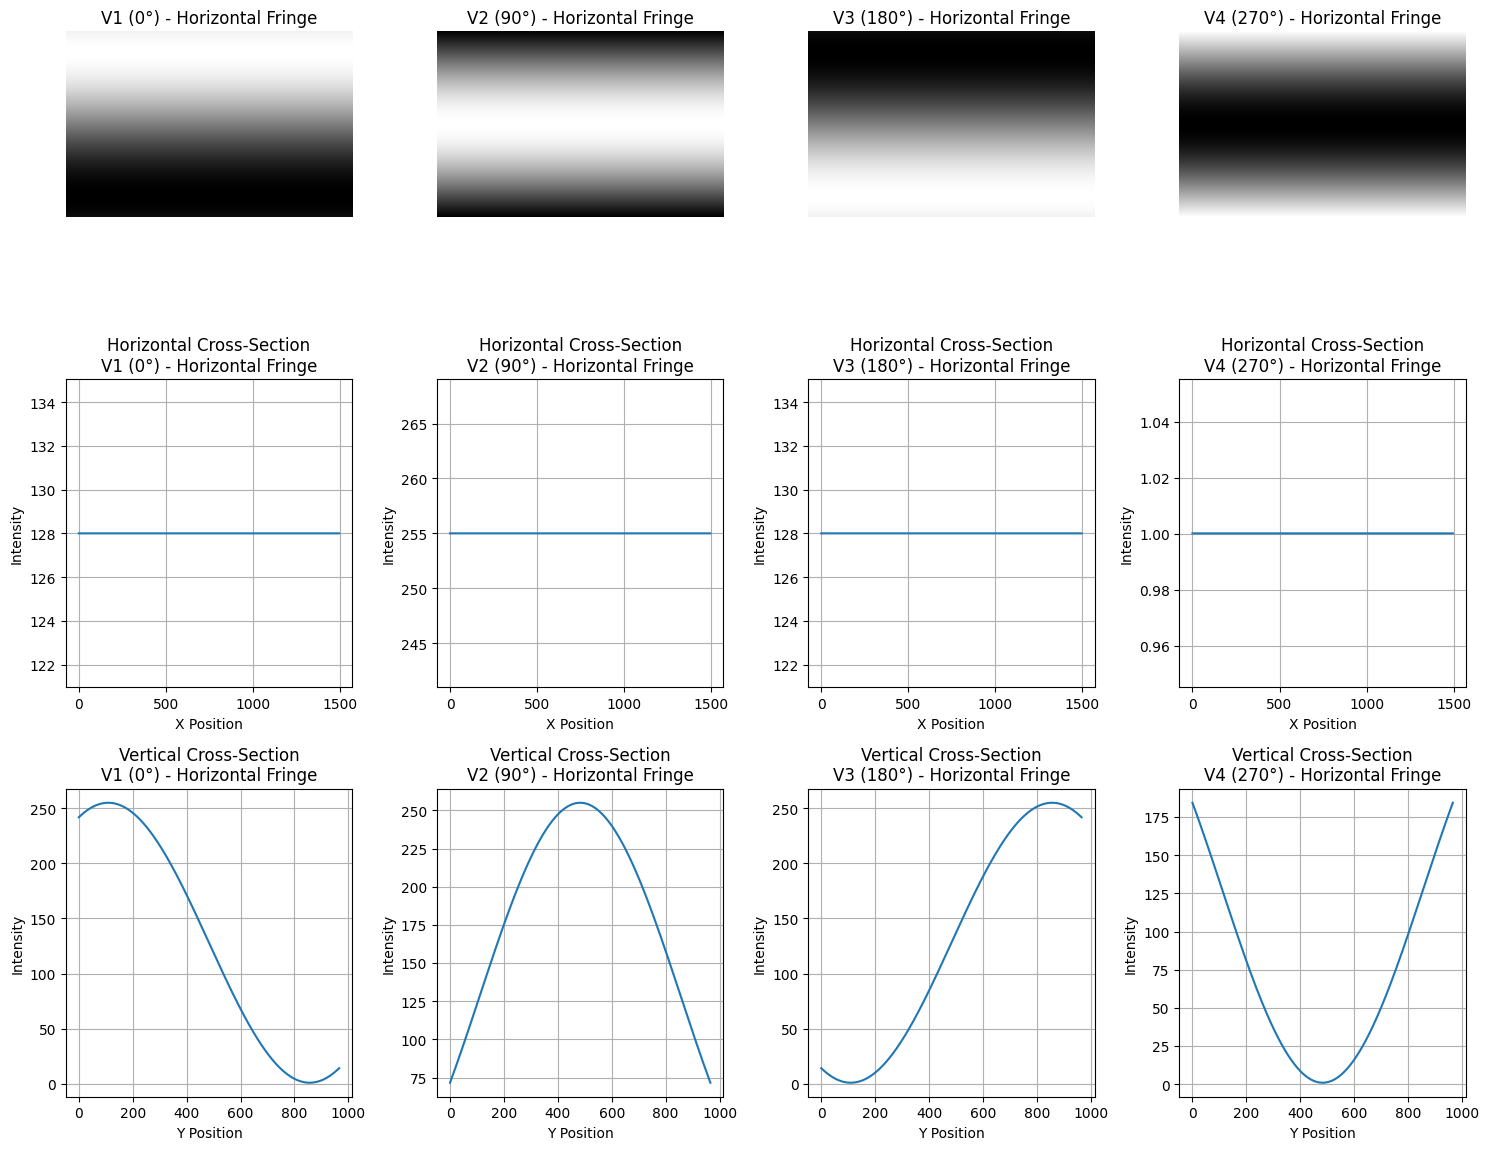

In [2]:
## horizontal plots
if __name__ == "__main__":
    # Hardcode your screen size (16-inch, 3456 × 2234)
    screen_width, screen_height = 1496, 967
    print(f"Screen resolution: {screen_width} x {screen_height} pixels")
    
    # Set image dimensions to match screen size (or a fraction of it)
    scaling_factor = 1.0  # Reduced to 20% to make it more manageable
    width = int(screen_width * scaling_factor)
    height = int(screen_height * scaling_factor)
    print(f"Image dimensions: {width} x {height} pixels")
    
    # Generate the initial image with a sinusoidal fringe pattern (one period)
    initial_image, true_phase = generate_sinusoidal_fringe_pattern(
        (height, width), amplitude=127, background=128, orientation='horizontal'
    )
    
    # Generate four phase-shifted images
    V1, V2, V3, V4 = generate_phase_shifted_images(initial_image, true_phase)
    
    # Visualize the results (corrected function call)
    plot_results(V1, V2, V3, V4, orientation='horizontal')

Automated display function for PART II

In [ ]:
import numpy as np
import time
import platform
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QLabel
from PyQt5.QtCore import Qt, QTimer
from PyQt5.QtGui import QImage, QPixmap
import cv2
import os

class FringePatternWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Fringe Patterns")
        self.setWindowFlags(Qt.WindowStaysOnTopHint | Qt.FramelessWindowHint)
        
        self.screen_width = QApplication.primaryScreen().size().width()
        self.screen_height = QApplication.primaryScreen().size().height()
        print(f"Detected screen resolution: {self.screen_width} x {self.screen_height} pixels")
        
        self.image_label = QLabel(self)
        self.image_label.setAlignment(Qt.AlignCenter)
        self.setCentralWidget(self.image_label)
        
        self.current_image_index = 0
        self.all_images = []
        self.interval_seconds = 2.0
        self.is_running = False
        
        self.timer = QTimer(self)
        self.timer.timeout.connect(self.show_next_image)
    
    def generate_sinusoidal_fringe_pattern(self, shape, amplitude=1.0, background=1.0, orientation='vertical'):
        height, width = shape
        if orientation == 'vertical':
            x = np.linspace(0, 2 * np.pi, width)
            X = np.tile(x, (height, 1))
            true_phase = X
        elif orientation == 'horizontal':
            phase_shift = np.pi/2
            scaled_height = height/width * 2 * np.pi
            initial_y_offset = (2 * np.pi - scaled_height)/2
            y = np.linspace(initial_y_offset - phase_shift, 
                          (scaled_height + initial_y_offset - phase_shift), 
                          height)
            Y = np.tile(y, (width, 1)).T
            true_phase = Y
        else:
            raise ValueError("Orientation must be 'vertical' or 'horizontal'")
        
        initial_image = background + amplitude * np.cos(true_phase)
        return initial_image, true_phase
    
    def generate_phase_shifted_images(self, initial_image, true_phase):
        background = np.mean(initial_image)
        amplitude = (np.max(initial_image) - np.min(initial_image)) / 2
        
        I1 = background + amplitude * np.cos(true_phase)
        I2 = background + amplitude * np.cos(true_phase - np.pi/2)
        I3 = background + amplitude * np.cos(true_phase - np.pi)
        I4 = background + amplitude * np.cos(true_phase - 3*np.pi/2)
        
        images = [I1, I2, I3, I4]
        images_8bit = []
        for img in images:
            img_normalized = (img - np.min(img)) / (np.max(img) - np.min(img))
            img_8bit = (img_normalized * 255).astype(np.uint8)
            images_8bit.append(img_8bit)
        
        return images_8bit
    
    def prepare_images(self):
        # Create output directory if it doesn't exist
        output_dir = "fringe_patterns"
        os.makedirs(output_dir, exist_ok=True)
        
        # Generate vertical patterns
        vert_initial, vert_phase = self.generate_sinusoidal_fringe_pattern(
            (self.screen_height, self.screen_width), 
            amplitude=1.0, 
            background=1.0, 
            orientation='vertical'
        )
        vertical_images = self.generate_phase_shifted_images(vert_initial, vert_phase)
        
        # Save vertical images
        for i, img in enumerate(vertical_images):
            filename = os.path.join(output_dir, f"vertical_phase_{i}.png")
            cv2.imwrite(filename, img)
            print(f"Saved {filename}")
        
        # Generate horizontal patterns
        horiz_initial, horiz_phase = self.generate_sinusoidal_fringe_pattern(
            (self.screen_height, self.screen_width), 
            amplitude=1.0, 
            background=1.0, 
            orientation='horizontal'
        )
        horizontal_images = self.generate_phase_shifted_images(horiz_initial, horiz_phase)
        
        # Save horizontal images
        for i, img in enumerate(horizontal_images):
            filename = os.path.join(output_dir, f"horizontal_phase_{i}.png")
            cv2.imwrite(filename, img)
            print(f"Saved {filename}")
        
        self.all_images = vertical_images + horizontal_images
        print(f"Generated and saved {len(self.all_images)} fringe pattern images")
    
    def start_display(self, interval_seconds):
            if not self.all_images:
                print("No images to display. Please generate images first.")
                return
                
            self.interval_seconds = max(0.1, interval_seconds)  # Minimum interval to prevent freezing
            self.showFullScreen()
            self.current_image_index = 0
            self.is_running = True
            self.show_image(self.current_image_index)
            self.timer.start(int(self.interval_seconds * 1000))
            print("Press 'q' or 'Esc' to quit the display")
    
    def show_image(self, index):
        if not self.all_images or index < 0 or index >= len(self.all_images):
            return
            
        print(f"Displaying image {index+1} of {len(self.all_images)} "
              f"({'vertical' if index < 4 else 'horizontal'})")
        image = self.all_images[index]
        
        try:
            height, width = image.shape
            bytes_per_line = width
            
            if not image.flags['C_CONTIGUOUS']:
                image = np.ascontiguousarray(image)
            
            image_data = image.tobytes()
            q_image = QImage(image_data, width, height, bytes_per_line, QImage.Format_Grayscale8)
            
            if q_image.isNull():
                raise ValueError("Failed to create QImage")
                
            pixmap = QPixmap.fromImage(q_image)
            self.image_label.setPixmap(pixmap.scaled(self.screen_width, self.screen_height,
                                                 Qt.IgnoreAspectRatio, Qt.SmoothTransformation))
        except Exception as e:
            print(f"Error displaying image: {e}")
    
    def show_next_image(self):
        if not self.is_running:
            return
            
        self.current_image_index += 1
        if self.current_image_index >= len(self.all_images):
            self.current_image_index = 0  # Loop back to start instead of closing
            print("Looping back to first image")
        
        self.show_image(self.current_image_index)
    
    def keyPressEvent(self, event):
        if event.key() in (Qt.Key_Q, Qt.Key_Escape):
            self.stop_display()
        event.accept()  # Mark event as handled
    
    def stop_display(self):
        self.is_running = False
        self.timer.stop()
        self.close()
        print("Display stopped")

def main():
    app = QApplication(sys.argv)
    window = FringePatternWindow()
    
    window.prepare_images()
    
    try:
        interval_seconds = float(input("Enter the display interval in seconds (e.g., 2.0): "))
    except ValueError:
        interval_seconds = 2.0
        print("Invalid input, using default value of 2.0 seconds")
    
    window.start_display(interval_seconds)
    
    return app.exec_()

if __name__ == "__main__":
    sys.exit(main())

Detected screen resolution: 1496 x 967 pixels
Saved fringe_patterns/vertical_phase_0.png
Saved fringe_patterns/vertical_phase_1.png
Saved fringe_patterns/vertical_phase_2.png
Saved fringe_patterns/vertical_phase_3.png
Saved fringe_patterns/horizontal_phase_0.png
Saved fringe_patterns/horizontal_phase_1.png
Saved fringe_patterns/horizontal_phase_2.png
Saved fringe_patterns/horizontal_phase_3.png
Generated and saved 8 fringe pattern images
Displaying image 1 of 8 (vertical)
Image shape: (967, 1496), min: 0, max: 255


2025-03-23 20:28:17.144 python[40899:2925539] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-23 20:28:17.144 python[40899:2925539] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Displaying image 2 of 8 (vertical)
Image shape: (967, 1496), min: 0, max: 255
Displaying image 3 of 8 (vertical)
Image shape: (967, 1496), min: 0, max: 255
Displaying image 4 of 8 (vertical)
Image shape: (967, 1496), min: 0, max: 255
Displaying image 5 of 8 (horizontal)
Image shape: (967, 1496), min: 0, max: 255
Displaying image 6 of 8 (horizontal)
Image shape: (967, 1496), min: 0, max: 255
Displaying image 7 of 8 (horizontal)
Image shape: (967, 1496), min: 0, max: 255
Displaying image 8 of 8 (horizontal)
Image shape: (967, 1496), min: 0, max: 255


SystemExit: 0

/Users/ganqiwen/miniconda3/envs/ImgSci/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3557: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
